In [40]:
import pandas as pd
import requests
import matplotlib.pyplot as plt 

# Download the data from given link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

pokemon_list = data["pokemon"]
structured_data = []

for pokemon in pokemon_list:
    pokemon_info = {
        'id': pokemon['id'],
        'num': pokemon['num'],
        'name': pokemon['name'],
        'img': pokemon['img'],
        'type': ', '.join(pokemon['type']),
        'height': pokemon['height'],
        'weight': pokemon['weight'],
        'candy': pokemon['candy'],
        'candy_count': pokemon.get('candy_count', 0),
        'egg': pokemon['egg'],
        'spawn_chance': pokemon['spawn_chance'],
        'avg_spawns': pokemon['avg_spawns'],
        'spawn_time': pokemon['spawn_time'],
        'multipliers': pokemon['multipliers'],
        'weakness' : pokemon['weaknesses'],
        'next_evolution': [evo['name'] for evo in pokemon.get('next_evolution', [])],
        'prev_evolution': [evo['name'] for evo in pokemon.get('prev_evolution', [])]
    }

    structured_data.append(pokemon_info)

df = pd.DataFrame(structured_data)

df.to_excel('pokemon.xlsx', index=False)



In [11]:
df=pd.read_excel('/content/pokemon.xlsx')
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","['Ivysaur', 'Venusaur']",[]
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']",['Venusaur'],['Bulbasaur']
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,0,Not in Eggs,0.017,1.7,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",[],"['Bulbasaur', 'Ivysaur']"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.253,25.3,08:45,[1.65],"['Water', 'Ground', 'Rock']","['Charmeleon', 'Charizard']",[]
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.012,1.2,19:00,[1.79],"['Water', 'Ground', 'Rock']",['Charizard'],['Charmander']


           name  spawn_chance
0     Bulbasaur        0.6900
1       Ivysaur        0.0420
2      Venusaur        0.0170
3    Charmander        0.2530
4    Charmeleon        0.0120
..          ...           ...
146     Dratini        0.3000
147   Dragonair        0.0200
148   Dragonite        0.0011
149      Mewtwo        0.0000
150         Mew        0.0000

[147 rows x 2 columns]


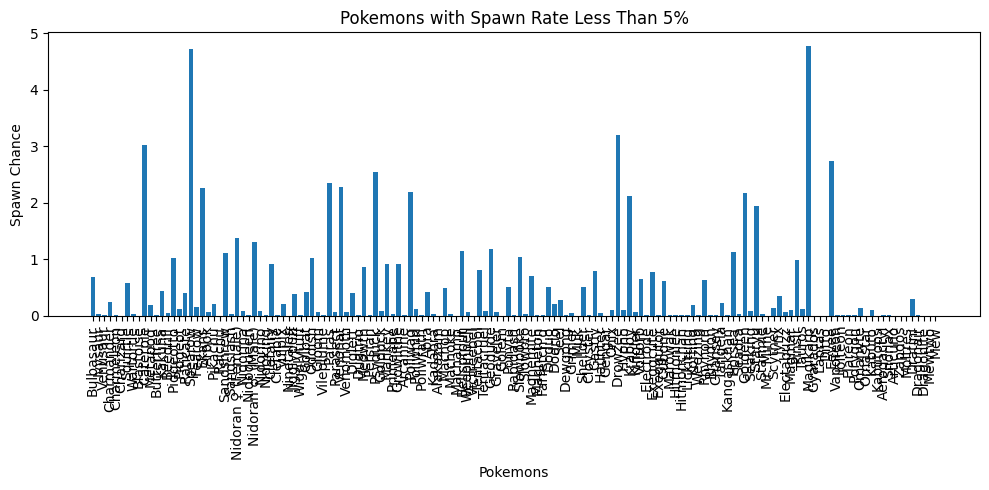

In [46]:
# Get all Pokemons whose spawn rate is less than 5%
# the spawn rate refers to the likelihood or frequency at which a particular Pokémon species appears in the game world.
spawn_rate_less_than_5 = df[df['spawn_chance']<5]
print(spawn_rate_less_than_5[['name', 'spawn_chance']])

plt.figure(figsize=(10, 5))
plt.bar(spawn_rate_less_than_5['name'], spawn_rate_less_than_5['spawn_chance'])
plt.xticks(rotation='vertical')
plt.xlabel('Pokemons')
plt.ylabel('Spawn Chance')
plt.title('Pokemons with Spawn Rate Less Than 5%')
plt.tight_layout()
plt.show()

In [52]:
# Get all Pokemons that have less than 4 weaknesses

pokemon_less_than_4_weaknesses = df[df['weakness'].apply(lambda x: len(x))<4]

pokemon_less_than_4_weaknesses["name"]




3      Charmander
4      Charmeleon
5       Charizard
6        Squirtle
7       Wartortle
          ...    
145       Moltres
146       Dratini
147     Dragonair
149        Mewtwo
150           Mew
Name: name, Length: 102, dtype: object

In [21]:
# Get all Pokemons that have no multipliers at all
pokemons_with_no_multipliers = df[df['multipliers'].isnull()]
pokemons_with_no_multipliers['name']

2        Venusaur
5       Charizard
8       Blastoise
11     Butterfree
14       Beedrill
          ...    
144        Zapdos
145       Moltres
148     Dragonite
149        Mewtwo
150           Mew
Name: name, Length: 81, dtype: object

In [23]:
# Get all Pokemons that do not have more than 2 evolutions
# Filter Pokémon with not more than 2 evolutions
pokemon_not_more_than_2_evolutions = df[df['next_evolution'].apply(lambda x: len(x) <= 2)]

pokemon_not_more_than_2_evolutions['name']


2        Venusaur
5       Charizard
8       Blastoise
11     Butterfree
14       Beedrill
          ...    
144        Zapdos
145       Moltres
148     Dragonite
149        Mewtwo
150           Mew
Name: name, Length: 81, dtype: object

In [33]:
# Get all Pokemons whose spawn time is less than 300 seconds.
pokemon_spawntime_less_tham_5_minutes=df[df['spawn_time']< "05:00"]
pokemon_spawntime_less_tham_5_minutes["name"]

6       Squirtle
8      Blastoise
10       Metapod
12        Weedle
13        Kakuna
         ...    
127       Tauros
129     Gyarados
134      Jolteon
136      Porygon
139       Kabuto
Name: name, Length: 75, dtype: object

In [36]:
#Get all Pokemon who have more than two types of capabilities
pokemons_more_than_two_types_capabilities = df[df['type'].apply(lambda x: len(x.split(',')))>2]
pokemons_more_than_two_types_capabilities["name"]

Series([], Name: name, dtype: object)